# Question 4: Creating Figure 1

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely
# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [8]:
# import the dataset
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

# do some data processing
# 1.compute the month average temperature from 2002 to 2012
avg_temperature = ds.analysed_sst.sel(lat=slice(33, 48), lon=slice(-132, -118),
                                      time=slice('2002', '2012')).groupby('time.month').mean(dim='time')

# 2.compute the month average temperature from 2014 to 2016 and put into an array
month_temperatures = []
for year in range(2014, 2017):
    for month in range(1, 13):
        month_temperatures.append(ds.analysed_sst.sel(lat=slice(33, 48), lon=slice(-132, -118),
                                                      time=f'{year}-{month}').mean(dim='time'))

# 3.compute the bias between a specific month and the average
delta = []
for i in range(36):
    delta.append(month_temperatures[i] - avg_temperature[i % 12, :, ])

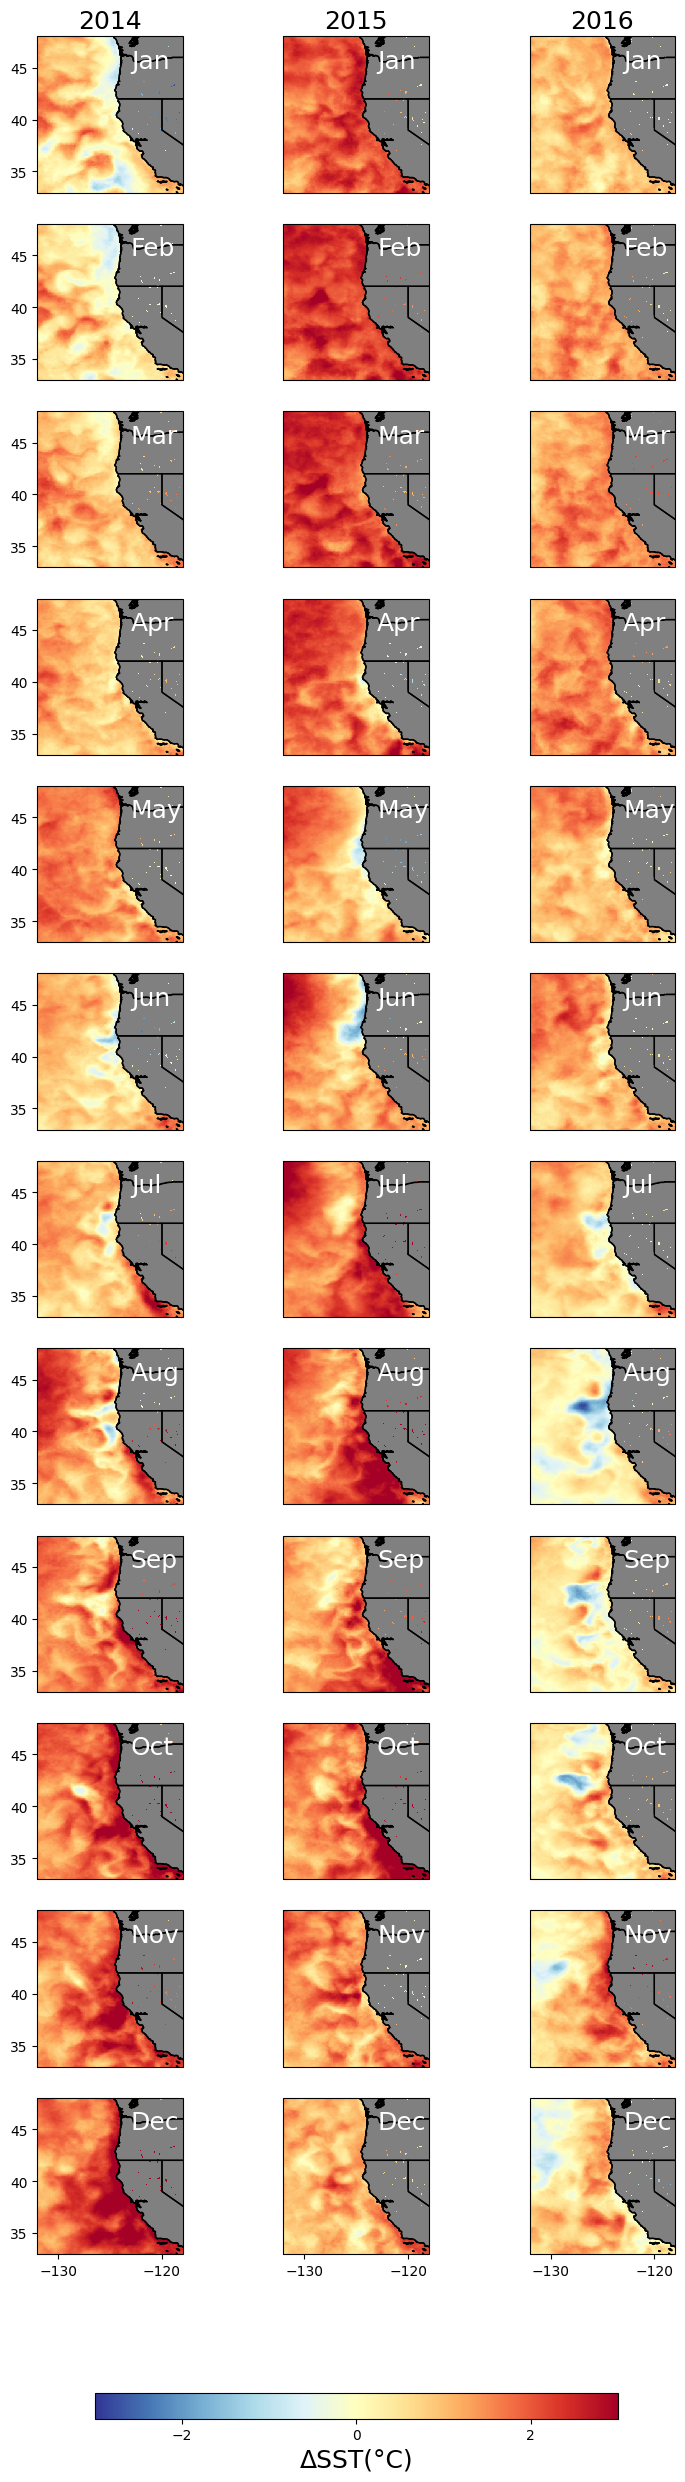

In [10]:
# do the plot
fig, axes = plt.subplots(nrows=12, ncols=3, subplot_kw=dict(projection=crs), figsize=(9, 36))
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for j in range(3):
    for i in range(12):

        # plot the anomalies of each month
        fig = delta[12*(j)+i].plot(ax=axes[i, j], transform=crs, add_colorbar=False, vmin=-3, vmax=3, cmap="RdYlBu_r")
        axes[i, j].coastlines("10m", color="k")
        axes[i, j].add_feature(cfeature.LAND, color="grey")
        axes[i, j].add_feature(cfeature.STATES.with_scale("10m"))
        axes[i, j].set_title("")

        # print the month on each figure
        axes[i, j].text(-123, 45, month[i], fontsize=18, color="white")

        # set Y axis on the left
        if j == 0:
            axes[i, j].set_yticks(range(35, 46, 5))
            axes[i, j].set_ylabel("")

        # print the year at the top of each column
        if i == 0:
            axes[i, j].set_title(f'{2014+j}', fontsize=18)

        # set X axis at the bottom
        if i == 11:
            axes[i, j].set_xticks(range(-130, -120+1, 10))
            axes[i, j].set_xlabel("")

# set the colorbar
color_bar = plt.colorbar(fig, ax=axes, location='bottom', shrink=0.75, pad=0.05)
color_bar.set_label("ΔSST(°C)", fontsize=18)
color_bar.set_ticks(range(-2, 3, 2))
plt.show()